In [2]:
#Install Libraries and loading the data
import pandas as pd

# Provide the full path to the CSV file
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\sales_data.csv')

# View the first few rows of the dataset
print(df.head())


   Order ID     Product     Category  Quantity Sold  Unit Price  Total Sales  \
0      1001      Laptop  Electronics              5         800         4000   
1      1002  Smartphone  Electronics             10         500         5000   
2      1003      Tablet  Electronics              7         300         2100   
3      1004       Chair    Furniture             15         100         1500   
4      1005        Desk    Furniture              8         200         1600   

  Region        Date  
0  North  2023-01-01  
1  South  2023-01-02  
2   West  2023-01-03  
3   East  2023-01-04  
4  North  2023-01-05  


In [3]:
#Inspect the Data
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types and basic statistics
print(df.info())
print(df.describe())


   Order ID     Product     Category  Quantity Sold  Unit Price  Total Sales  \
0      1001      Laptop  Electronics              5         800         4000   
1      1002  Smartphone  Electronics             10         500         5000   
2      1003      Tablet  Electronics              7         300         2100   
3      1004       Chair    Furniture             15         100         1500   
4      1005        Desk    Furniture              8         200         1600   

  Region        Date  
0  North  2023-01-01  
1  South  2023-01-02  
2   West  2023-01-03  
3   East  2023-01-04  
4  North  2023-01-05  
Order ID         0
Product          0
Category         0
Quantity Sold    0
Unit Price       0
Total Sales      0
Region           0
Date             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       20 non-n

In [4]:
#Data Cleaning
# Handle missing values (if any)
df.fillna(0, inplace=True)  # Or you can use df.dropna()

# Convert date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for Total Sales if it doesn't exist
df['Total Sales'] = df['Quantity Sold'] * df['Unit Price']


In [5]:
#Basic Analysis
# 1. Total Sales
total_sales = df['Total Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 35750


In [6]:
# 2. Sales by Region
sales_by_region = df.groupby('Region')['Total Sales'].sum().reset_index()
print(sales_by_region)


  Region  Total Sales
0   East         4350
1  North        11450
2  South         9750
3   West        10200


In [7]:
#3 Sales by Product
sales_by_product = df.groupby('Product')['Total Sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Total Sales', ascending=False)
print(sales_by_product)


         Product  Total Sales
12    Smartphone         5000
7         Laptop         4000
11  Refrigerator         2700
16         Table         2500
0         Camera         2400
13    Smartwatch         2400
18    Television         2400
1          Chair         2250
17        Tablet         2100
2           Desk         1600
5     Headphones         1500
15       Speaker         1500
14          Sofa         1400
10       Printer         1250
4            Fan          800
6       Keyboard          600
9          Mouse          500
8        Monitor          450
3      Desk Lamp          400


In [8]:
#  4.Sales by Category
sales_by_category = df.groupby('Category')['Total Sales'].sum().reset_index()
print(sales_by_category)


      Category  Total Sales
0  Electronics        26800
1    Furniture         8950


In [9]:
# 5. Sales by Month
df['Month'] = df['Date'].dt.month
sales_by_month = df.groupby('Month')['Total Sales'].sum().reset_index()
print(sales_by_month)


   Month  Total Sales
0      1        35750


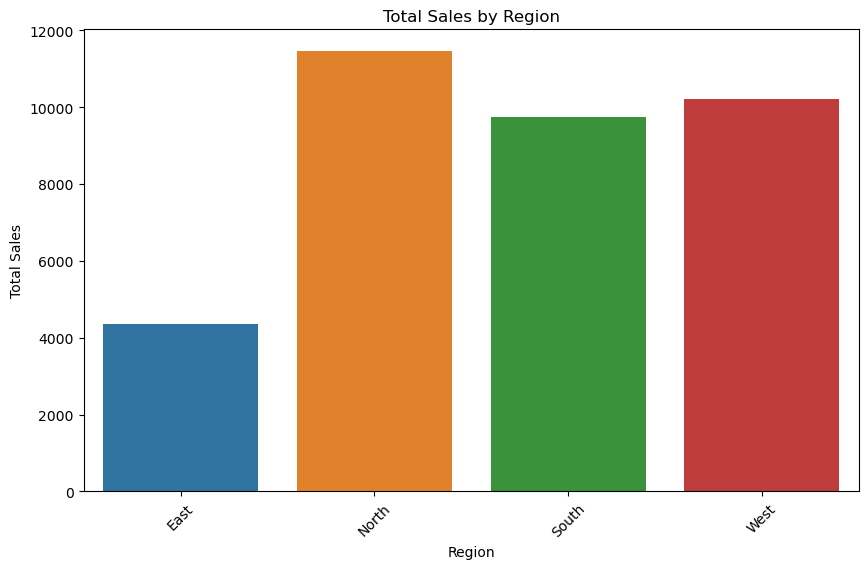

In [10]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x='Region', y='Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()


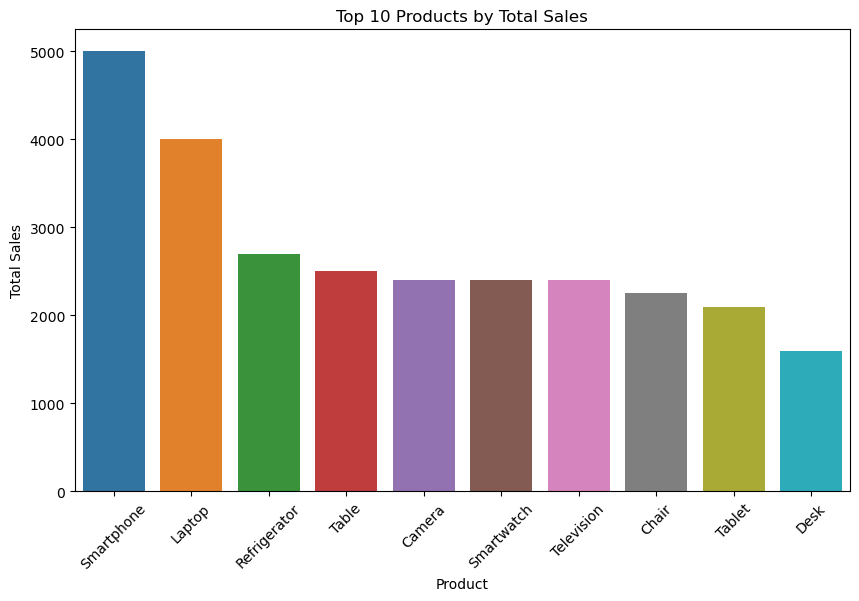

In [11]:
#Sales by Product (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_product.head(10), x='Product', y='Total Sales')
plt.title('Top 10 Products by Total Sales')
plt.xticks(rotation=45)
plt.show()
